In [1]:
import glob
import os

import krippendorff
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings

from utils import *

In [2]:
# Gestion des warnings
warnings.filterwarnings("ignore")

# Agrégation des tableaux de veille

In [3]:
# Chemin vers le dossier 'data'
data_dir = "data"
base_file_name = "Tableau_lecture_presse-ecrite_Ete2025_veilleur*"

# Cherche tous les fichiers correspondants dans les sous-dossiers
file_pattern = os.path.join(data_dir, "**", base_file_name)
files = glob.glob(file_pattern, recursive=True)

# Lis et concatène tous les fichiers trouvés
df_list = [pd.read_excel(f, sheet_name="Articles à lire", skiprows=1) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Affiche la taille du DataFrame
print(f"Nombre de lignes concaténées : {len(df)}")

Nombre de lignes concaténées : 229


In [4]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege.xlsx")
df.to_excel(output_file, index=False)

# Vérification de l'agrégation

In [5]:
# Résumé du tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 18 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Personne en charge de la veille (nom, prénom)                                                                     229 non-null    object
 1   Pack                                                                                                              229 non-null    object
 2   Titre                                                                                                             229 non-null    object
 3   Lien ou titre de l'article                                                                                        229 non-null    object
 4   Le sujet de l'article concerne-t-il un

In [6]:
# Premières lignes du DataFrame
df.head(3)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau
0,veilleur_1,Base,Pourquoi le Groenland est l'objet des plus gra...,LePointfr_1744820405000_2360.pdf,"Ressources naturelles, Biodiversité","conséquences, constats",Industrie,NaN,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,Métaux/minerais,Reportage abordant plusieurs enjeux du Groenla...,L'article aborde 2 crises mais ne fait pas le ...
1,veilleur_1,Base,"Les secrets bien gardés de Montecristo, « l'îl...",LePointfr_1745384703000_4434.pdf,Biodiversité,solutions,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,NaN,aucun milieu en particulier,NaN,NaN,NaN,Action de protection de l'Ile de Monte Cristo ...,"là du coup, j'aurais eu envie de mettre action..."
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...


In [7]:
# Verification 
df.groupby(["Personne en charge de la veille (nom, prénom)", "Pack"]).size().reset_index(name='Nombre d\'articles')

,"Personne en charge de la veille (nom, prénom)",Pack,Nombre d'articles
0,Raphaël DEMONCHY,Base,4
1,Véronique ETIENNE,Base,5
2,Véronique ETIENNE,premium,9
3,veilleur_1,Base,9
4,veilleur_1,premium,10
5,veilleur_10,Base,1
6,veilleur_11,Base,10
7,veilleur_11,premium,9
8,veilleur_12,Base,9
9,veilleur_12,premium,7


In [8]:
# Verification 
df.groupby(["Titre"]).size().reset_index(name='Nombre d\'articles')

,Titre,Nombre d'articles
0,16 avril 1970 : un glissement de terrain cause...,5
1,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",5
2,Auray La goélette Tara fait une escale dédiée ...,5
3,Auray Le nouveau complexe de La Forêt a accuei...,5
4,Carrières 5 moyens de décrocher un job à impact,13
5,Ces entrepreneuses vous habillent en mode éthique,5
6,Chaud devant; Comment faire un nid sans chimie...,5
7,CriseiDes signes de reprise,5
8,"Dans le Var, les grands moyens pour sauver la ...",5
9,De bonnes nouvelles,8


# Analyse des résultats

## Identification des articles analysés

In [9]:
## Si aucune colonne n'a été remplie, on considère que l'article n'a pas été lu
df["veille_ok"] = df.apply(lambda x: x[4:].isna().all()==False, axis=1)
df.tail(6)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
223,veilleur_9,premium,Solutions Champions de l’économie sociale et e...,AujourdhuienFrance_1745285430000_145.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
224,veilleur_9,premium,Saint-Brieuc « Dire qu’on ne fait rien ce n’es...,LeTélégramme_1745387667000_4237.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
225,veilleur_9,premium,MCôtes-d'Armor Marais du Launay : comment la f...,LeTélégramme_1745387669000_4302.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
226,veilleur_9,premium,Ces entrepreneuses vous habillent en mode éthique,LeParisien_1745285431000_2153.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
227,veilleur_9,premium,Chaud devant; Comment faire un nid sans chimie...,LeMonde_1744455618000_3319.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
228,veilleur_9,premium,La consultation publique sur le projet de porc...,LaMontagne_1745356777000_3215.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [10]:
# Verification que tous les articles non lus sont dans le pack premium
df.groupby(["veille_ok", "Pack"]).size().reset_index(name='Nombre d\'articles')

,veille_ok,Pack,Nombre d'articles
0,False,Base,2
1,False,premium,75
2,True,Base,114
3,True,premium,38


In [11]:
# Analyse des résultats
df.groupby(["Pack", "Titre"])["veille_ok"].value_counts().reset_index(name='Nombre d\'articles') 

,Pack,Titre,veille_ok,Nombre d'articles
0,Base,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",True,5
1,Base,Auray La goélette Tara fait une escale dédiée ...,True,5
2,Base,Auray Le nouveau complexe de La Forêt a accuei...,True,5
3,Base,Carrières 5 moyens de décrocher un job à impact,True,5
4,Base,CriseiDes signes de reprise,True,5
...,...,...,...,...
56,premium,«Nous sommes des amortisseurs de crise»,True,2
57,premium,«Pas de ZFE sans alternative» selon le député ...,False,4
58,premium,«Pas de ZFE sans alternative» selon le député ...,True,1
59,premium,"À La Rochelle, on sait recycler les terres rar...",False,4


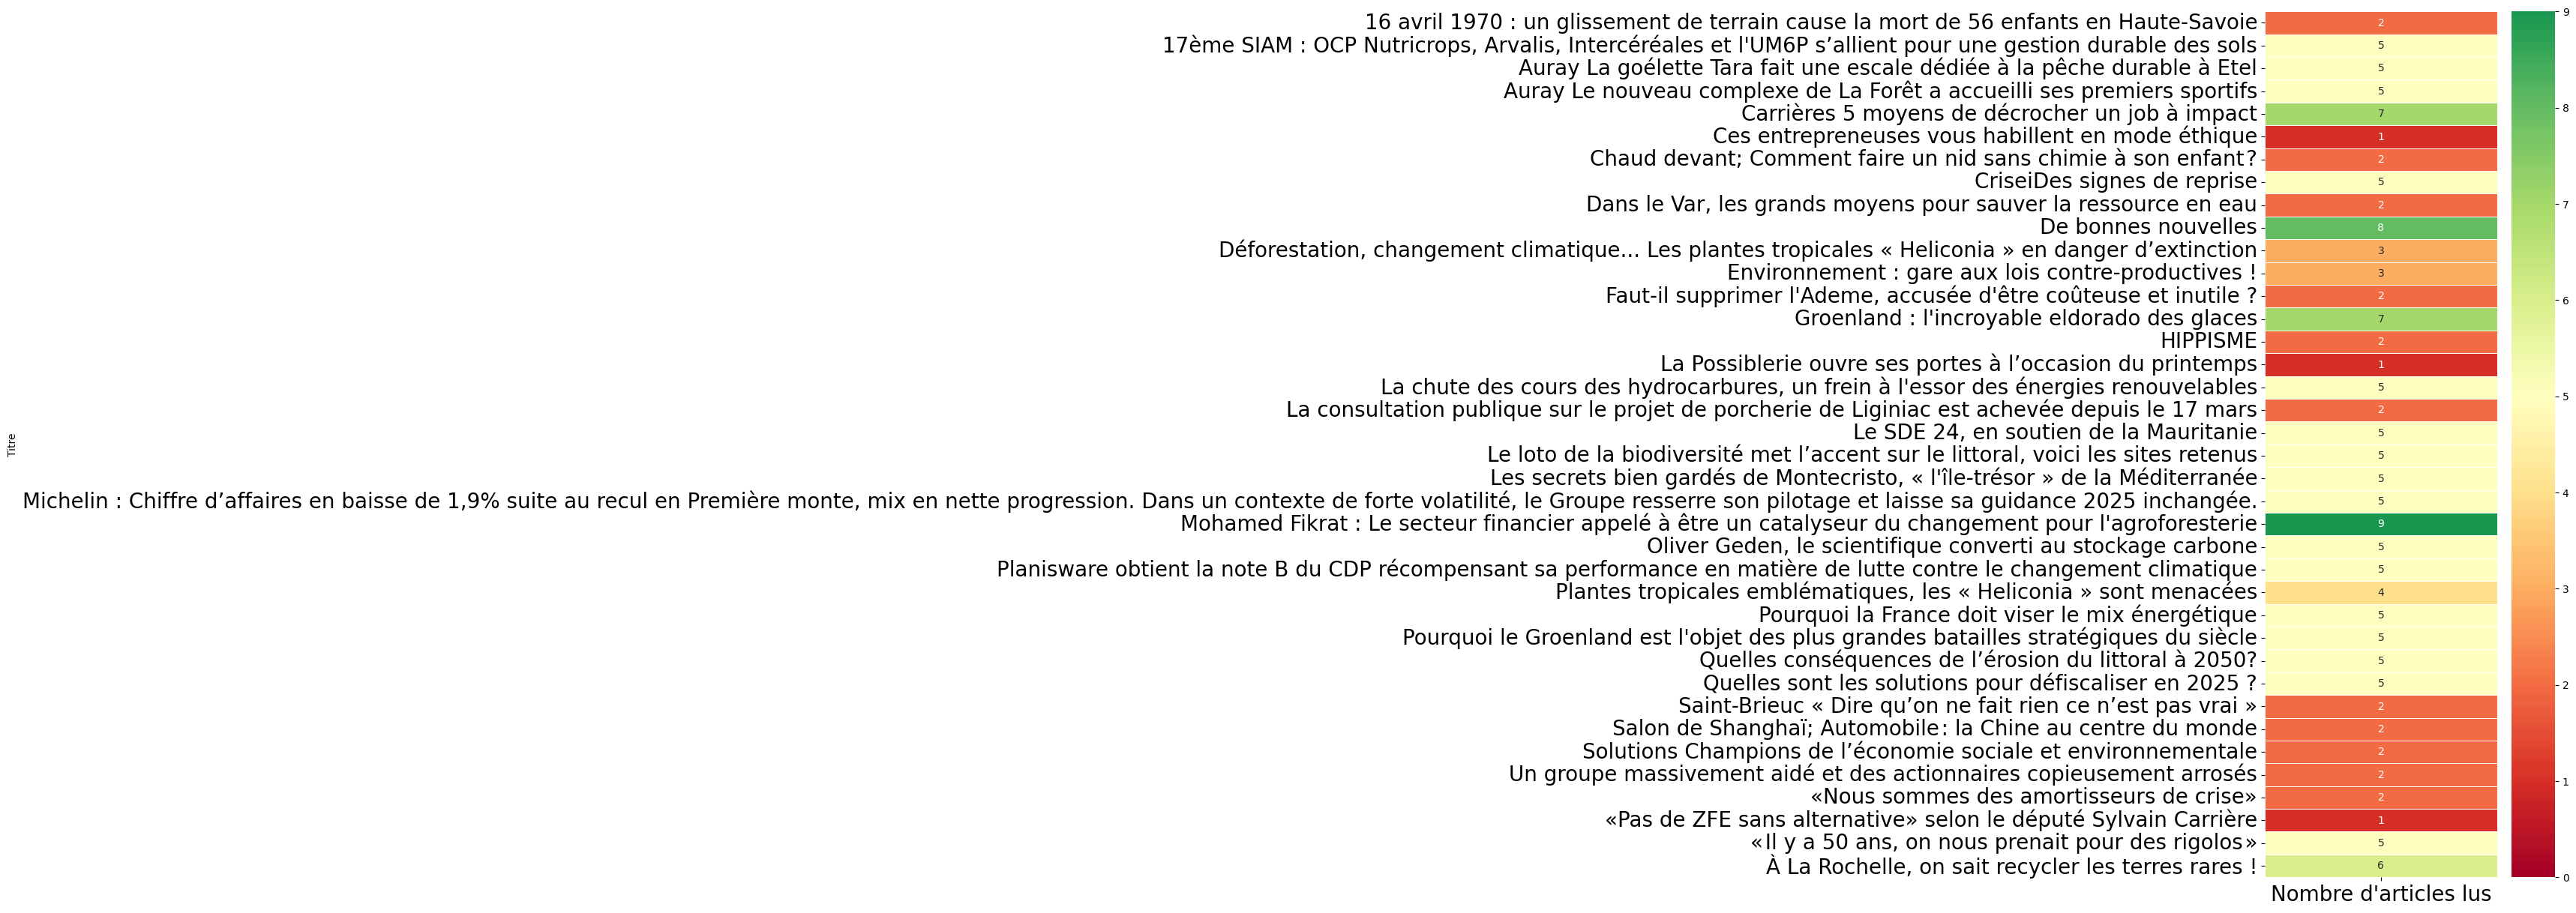

In [12]:
# Visualisation
plt.figure(figsize=(5, 15))
heatmap_data = df[df["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5
)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [13]:
# Préparation des données
df_base = df[df["Pack"] == "Base"]
df_premium = df[df["Pack"] == "premium"]

heatmap_base = df_base[df_base["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
heatmap_premium = df_premium[df_premium["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")

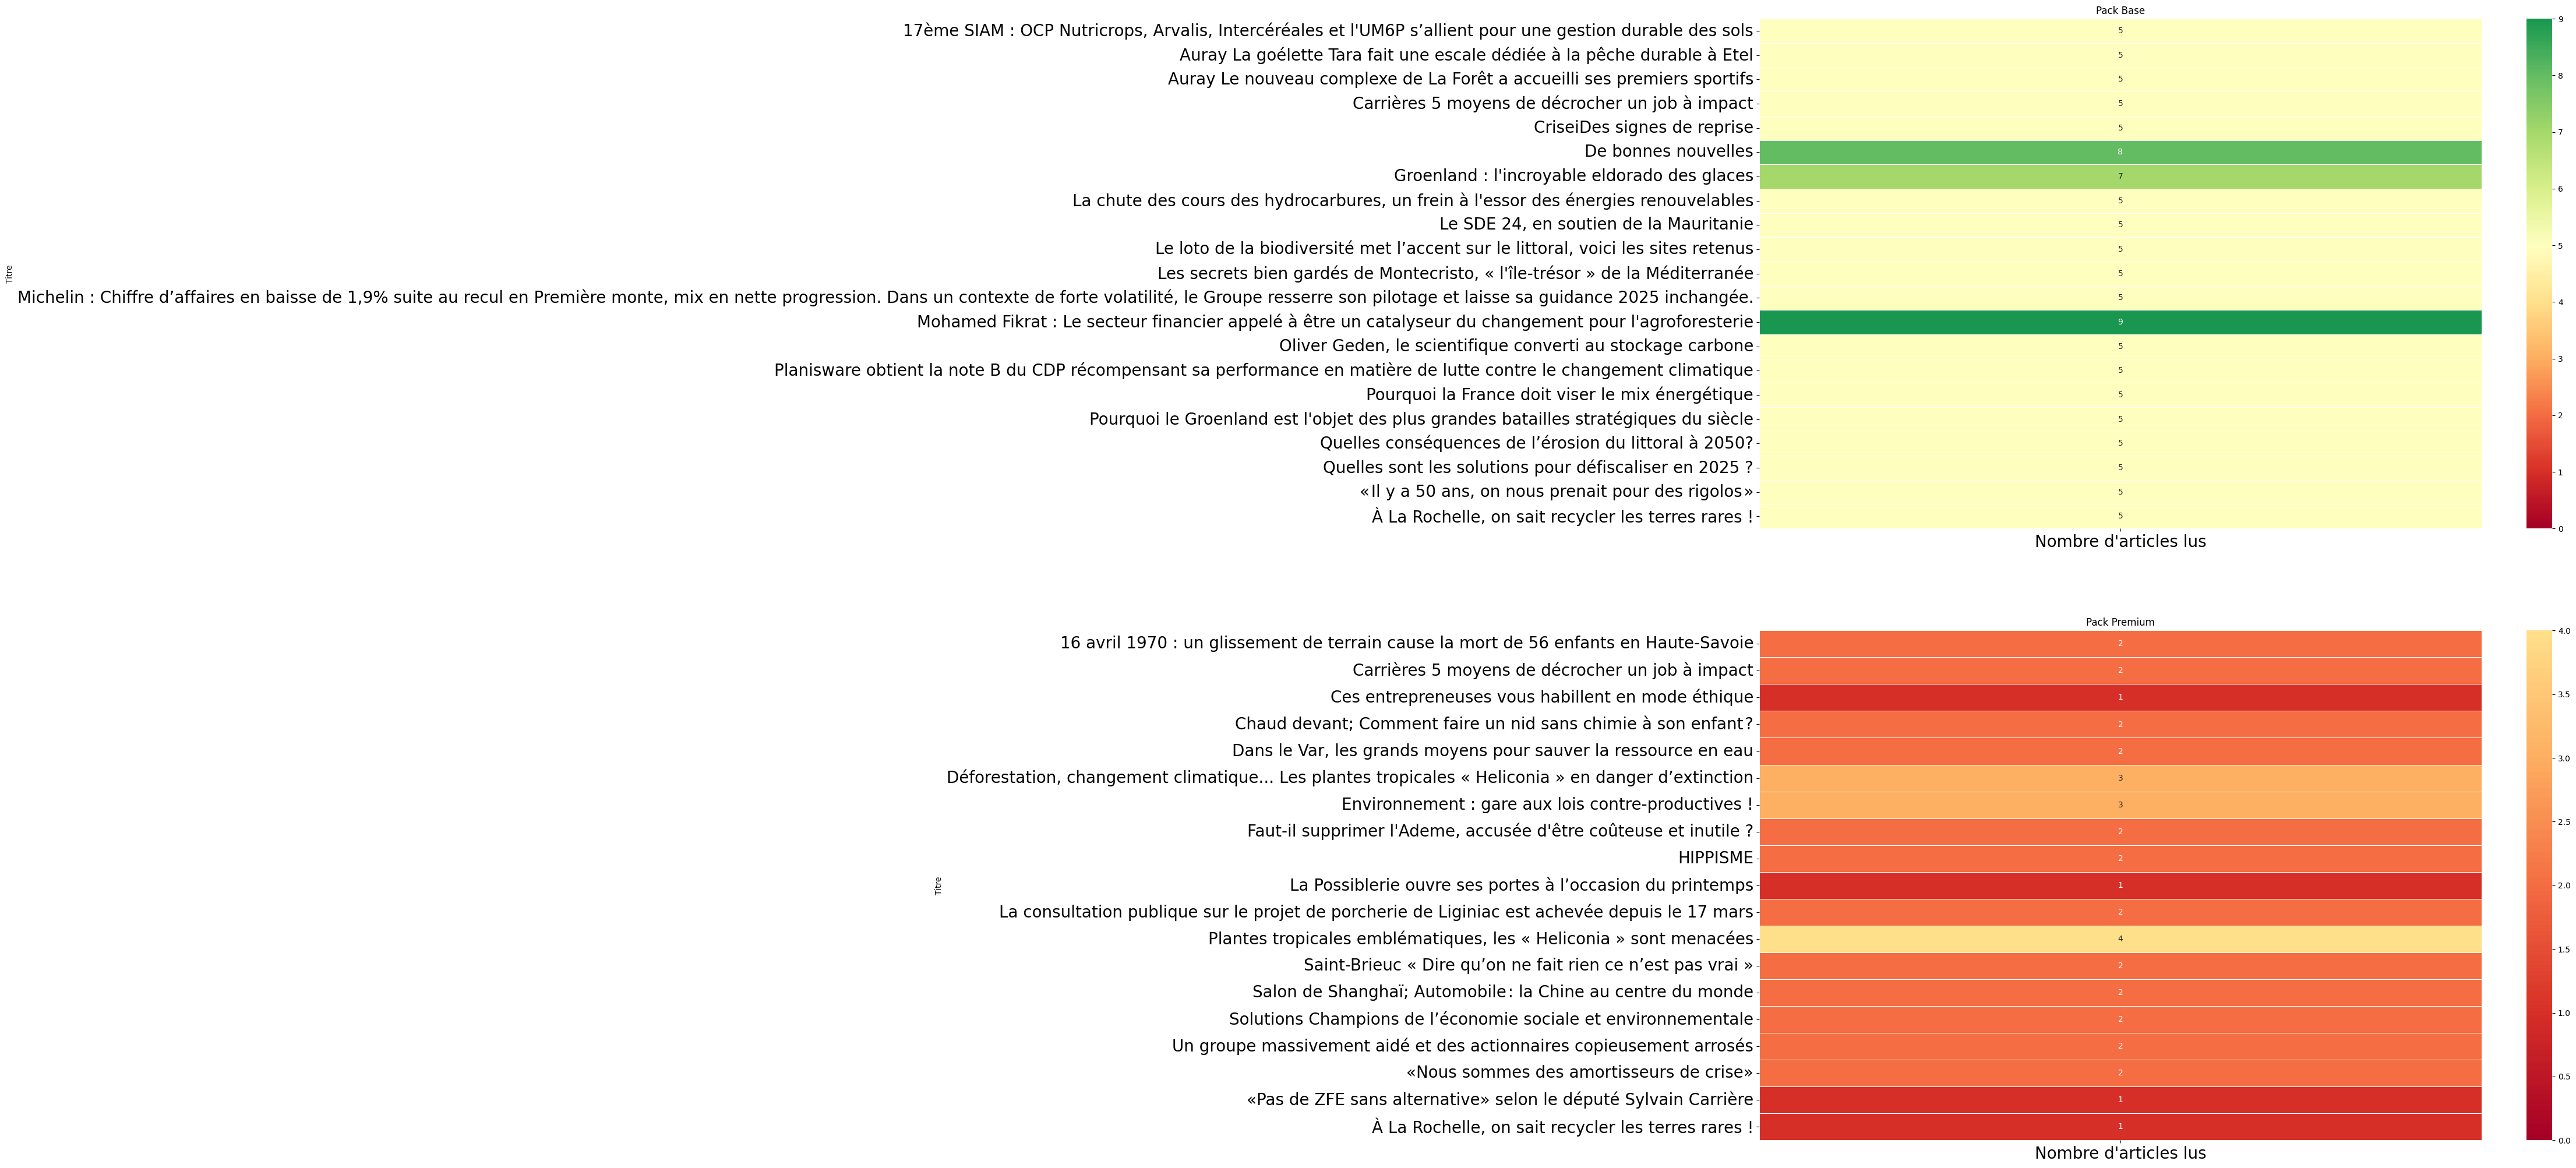

In [14]:
# Visualisation
fig, ax = plt.subplots(2, 1, figsize=(20, 25))
ax[0].set_title("Pack Base")
sns.heatmap(
    heatmap_base,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[0]
)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)


ax[1].set_title("Pack Premium")
sns.heatmap(
    heatmap_premium,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[1]
)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

=> L'analyse du pack de base est possible, tous les articles ont bien été lus à minima par 5 veilleurs

## Analyse Pack Base

### Exploration des résultats sur un article

In [15]:
# Choix des paramètres
liste_articles = df_base.Titre.unique().tolist()
id_article = 2
df_article = df_base[df_base.Titre == liste_articles[id_article]]
df_article

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...,True
21,Raphaël DEMONCHY,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,"Agriculture/Alimentation, Ecosystèmes",Ecosystèmes,NaN,NaN,NaN,"causes, solutions",Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,un article dédié à l'action de Tara en amont d...,NaN,True
58,veilleur_12,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Aucun de ces secteurs,NaN,solutions,écosystème/ espèce,NON,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
75,veilleur_13,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
149,veilleur_5,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,"Ecosystèmes, Agriculture/Alimentation",Agriculture/Alimentation,NaN,NaN,NaN,"constats, solutions",Océans,NaN,NaN,NaN,Sujet : Article sur une association qui sensib...,NaN,True


In [16]:
df_article.columns

Index(['Personne en charge de la veille (nom, prénom)', 'Pack', 'Titre',
       'Lien ou titre de l'article',
       'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?',
       'L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?',
       'L'article traite-t-il d'un ou plusieurs secteurs en particulier ?',
       'Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?',
       'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Quels enjeux sont évoqués ?',
       'L'article parle-t-il d'un évènement climatique?',
       'Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Type(s) de milieu mentionné(s)?',
       'L'article évoque-t-il les causes de l'érosion de la biodiversité?',
       'Si l'article parle de la crise des ressources, évoque-t-il les causes,

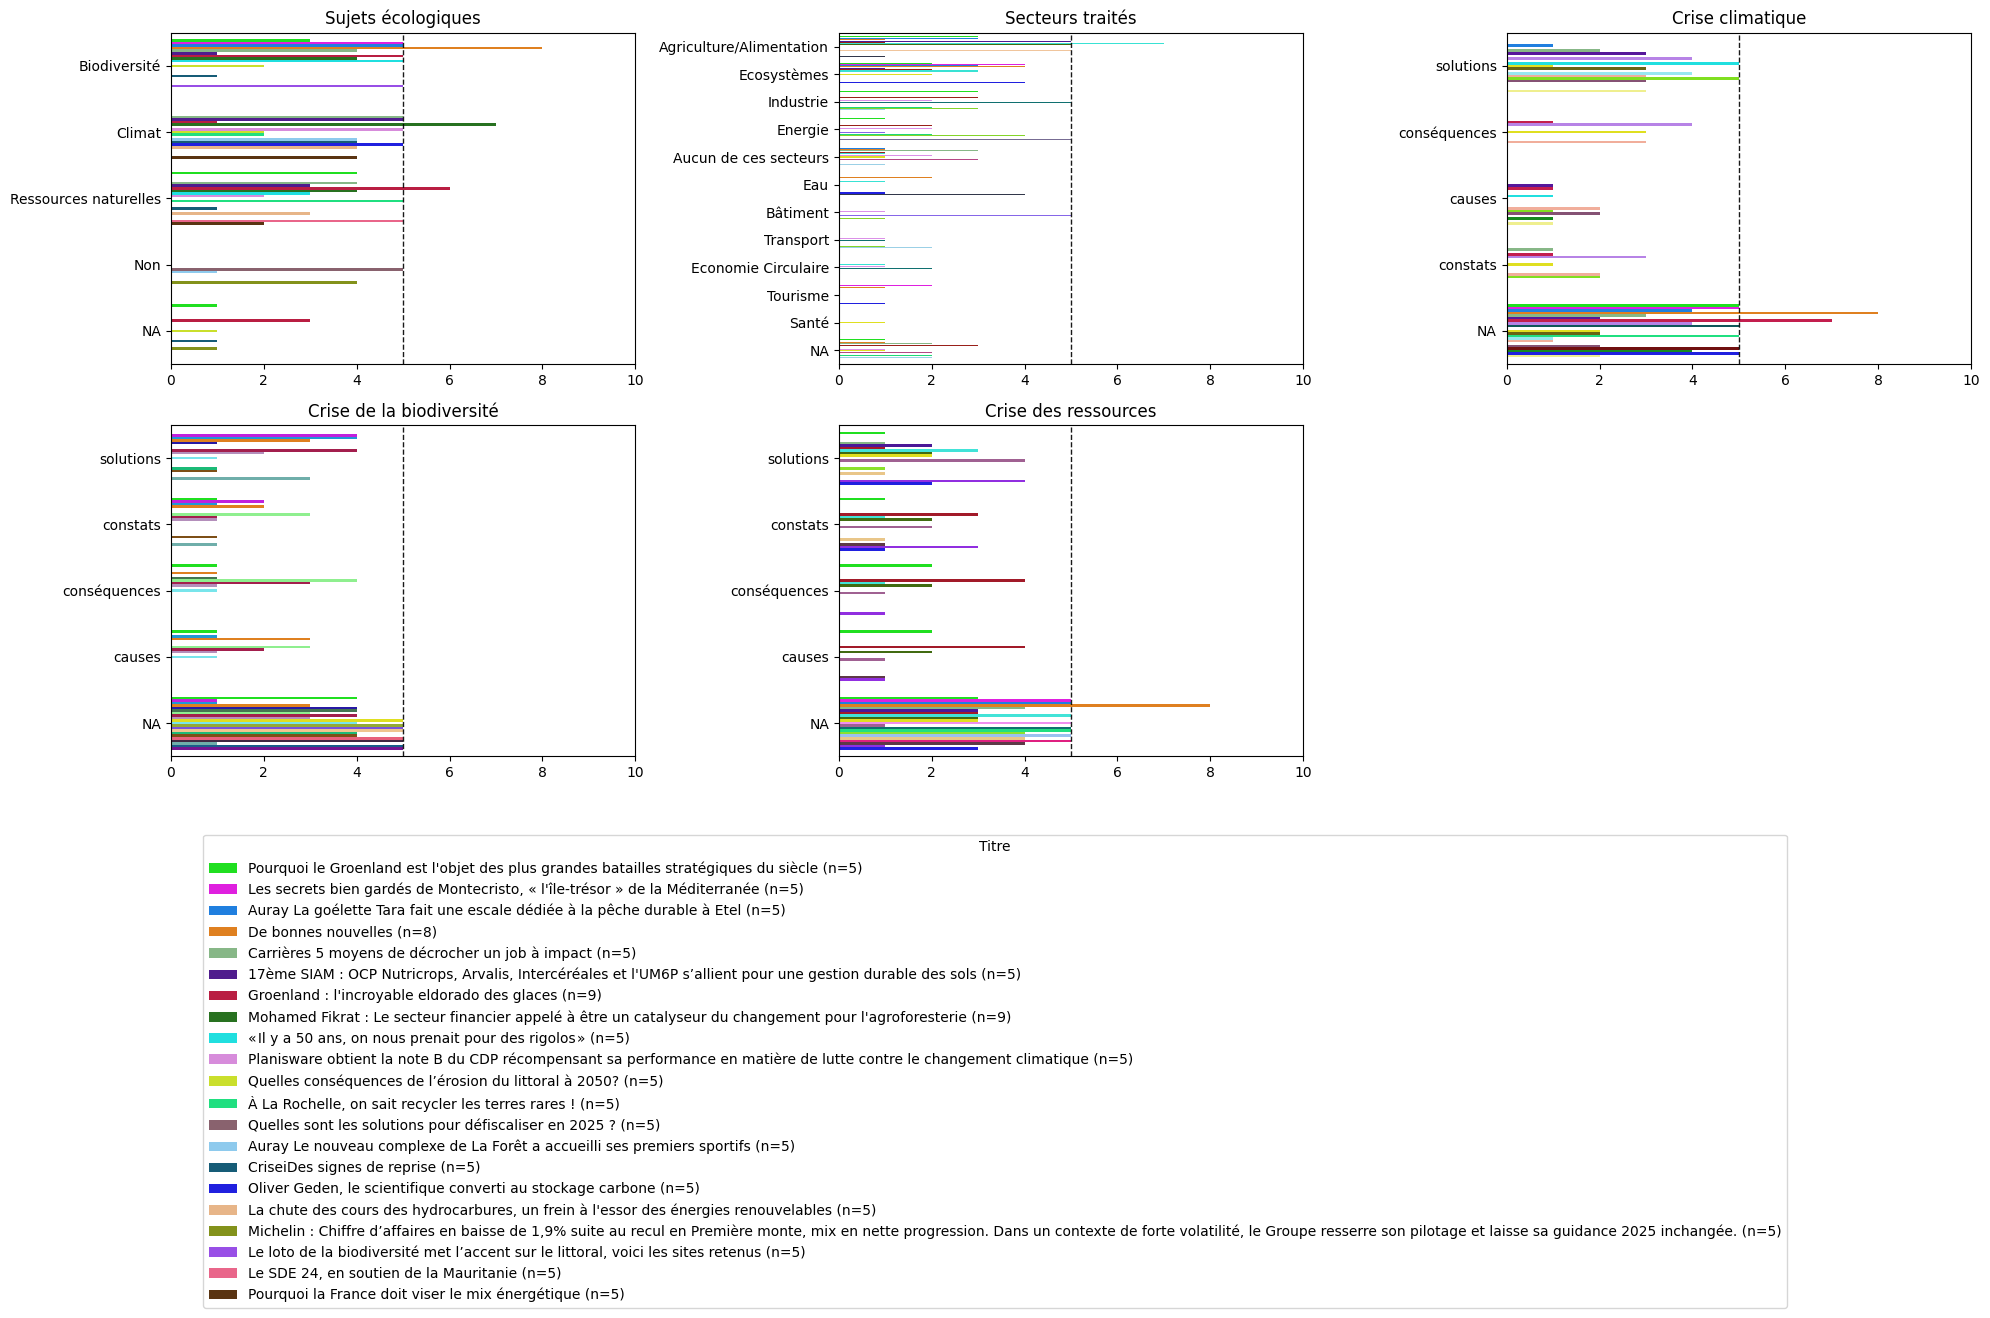

In [17]:
# Remplacer NaN par une modalité explicite
cols = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?"
]

titles = [
    "Sujets écologiques",
    "Secteurs traités",
    "Crise climatique",
    "Crise de la biodiversité",
    "Crise des ressources" 
]

# Graphique des countplots
plot_countplots(df_base, cols, titles, hue="Titre", na_label="NA", max_x=10)

In [18]:
# Export des données agrégées
df_base_sorted = df_base.sort_values(by=["Titre", "Pack"])
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege_packBase_trie.xlsx")
df_base_sorted.to_excel(output_file, index=False)


# Analyse statistique

https://theses.hal.science/LIDILEM/hal-04194831v1
=> Plusieurs méthodes de calcul ont été proposées pour quantifier le degré d’accord entre annotateurs. L’une des plus employées, malgré certains défauts (Feinstein et Cicchetti, 1990) et des restrictions sur son utilisation, est le Kappa (κ) de Cohen (Cohen, 1960). Des variations ont été proposées pour répondre à ses défauts ou limitations, comme le Kappa de Fleiss qui permet de prendre en compte trois ou plus annotateurs, ou le Kappa pondéré (Fleiss et al., 1969). D’autres méthodes ont également été développées comme le coefficient de Brennan-Prediger (Brennan et Prediger, 1981), le coefficient AC1/AC2 de Gwet (Gwet, 2008) ou plus récemment la méthode Gamma (Mathet et al., 2015). Pour cette communication, nous proposons d’examiner une mesure d’accord spécifique, l’Alpha de Krippendorff (Krippendorff, 2018). L’Alpha de Krippendorff, contrairement à d’autres mesures de l’accord inter-annotateurs, a été pensé pour répondre à des situations diverses. L’Alpha est en effet applicable quel que soit le nombre d’annotateurs et permet de prendre en compte plusieurs contraintes sur les données : • données évaluées sur différents types d’échelle (échelle nominale, ordinale, d’intervalle...) ; • échantillons de données de taille variable ; • données avec des annotations manquantes



## Test de l'alpha de Krippendorff sur une colonne spécifique, pour un article spécifique

In [19]:
# --- Utilitaires ---
import csv
import io

def to_list_multilabel(x):
    # 1) Déjà une liste
    if isinstance(x, list):
        return [s.strip() for s in x if str(s).strip()]

    # 2) NaN / vide
    if pd.isna(x) or not str(x).strip():
        return []

    s = str(x).strip()

    # 3) Parsing CSV (gère les guillemets autour des labels contenant des virgules)
    #    skipinitialspace=True tolère l'espace après la virgule.
    try:
        row = next(csv.reader(io.StringIO(s), delimiter=',', quotechar='"', skipinitialspace=True))
    except Exception:
        # Fallback très conservateur si jamais csv.reader échoue
        row = [p.strip() for p in s.split(',')]

    # 4) Nettoyage léger : strip espaces et guillemets résiduels
    parts = []
    for p in row:
        p = p.strip().strip('"').strip("'")
        if p and p.lower() != 'nan':
            parts.append(p)
    return parts
    


In [20]:
# Paramètres
col_veilleur = "Personne en charge de la veille (nom, prénom)"
col_titre  = "Titre"

questions_cols = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",
    "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
    "Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?",
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Quels enjeux sont évoqués ?",
    "L'article parle-t-il d'un évènement climatique?",
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Type(s) de milieu mentionné(s)?",
    "L'article évoque-t-il les causes de l'érosion de la biodiversité?",
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Type de ressource évoquée"
]

In [21]:
# Test de l'alhpa de Krippendorff sur une colonne spécifique et un article spécifique
col_to_test = "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"
data_test = df_base[[col_veilleur, col_titre, col_to_test]]
data_test

,"Personne en charge de la veille (nom, prénom)",Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?
0,veilleur_1,Pourquoi le Groenland est l'objet des plus gra...,"Ressources naturelles, Biodiversité"
1,veilleur_1,"Les secrets bien gardés de Montecristo, « l'îl...",Biodiversité
2,veilleur_1,Auray La goélette Tara fait une escale dédiée ...,Biodiversité
3,veilleur_1,De bonnes nouvelles,Biodiversité
4,veilleur_1,Carrières 5 moyens de décrocher un job à impact,"Climat, Biodiversité, Ressources naturelles"
...,...,...,...
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,"Ressources naturelles, Biodiversité"
216,veilleur_9,Mohamed Fikrat : Le secteur financier appelé à...,"Biodiversité, Climat"
217,veilleur_9,Pourquoi le Groenland est l'objet des plus gra...,NaN
218,veilleur_9,Quelles conséquences de l’érosion du littoral ...,Climat


In [22]:
data_test[col_to_test].unique()

array(['Ressources naturelles, Biodiversité', 'Biodiversité',
       'Climat, Biodiversité, Ressources naturelles',
       'Climat, Ressources naturelles', nan, 'Climat',
       'Biodiversité, Ressources naturelles',
       'Ressources naturelles, Climat', 'Non', 'Climat, Biodiversité',
       'Ressources naturelles',
       'Biodiversité, Ressources naturelles, Climat',
       'Biodiversité, Climat'], dtype=object)

In [23]:
# Test encodaoge
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Nettoyage : remplacer NaN par listes vides et transformer en liste de labels
data_encoded = data_test[[col_veilleur, col_titre, col_to_test]].copy()
data_encoded["labels"] = data_encoded[col_to_test].apply(to_list_multilabel)

# 2. Initialiser l'encodeur multilabel
mlb = MultiLabelBinarizer()

# 3. Transformer les données
encoded = mlb.fit_transform(data_encoded["labels"])
labels = list(mlb.classes_)

# 4. Créer un DataFrame avec les colonnes binaires
bin_df = pd.concat([data_encoded[[col_veilleur, col_titre]], pd.DataFrame(encoded, columns=labels, index=data_encoded.index)], axis=1)
bin_df

,"Personne en charge de la veille (nom, prénom)",Titre,Biodiversité,Climat,Non,Ressources naturelles
0,veilleur_1,Pourquoi le Groenland est l'objet des plus gra...,1,0,0,1
1,veilleur_1,"Les secrets bien gardés de Montecristo, « l'îl...",1,0,0,0
2,veilleur_1,Auray La goélette Tara fait une escale dédiée ...,1,0,0,0
3,veilleur_1,De bonnes nouvelles,1,0,0,0
4,veilleur_1,Carrières 5 moyens de décrocher un job à impact,1,1,0,1
...,...,...,...,...,...,...
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,1,0,0,1
216,veilleur_9,Mohamed Fikrat : Le secteur financier appelé à...,1,1,0,0
217,veilleur_9,Pourquoi le Groenland est l'objet des plus gra...,0,0,0,0
218,veilleur_9,Quelles conséquences de l’érosion du littoral ...,0,1,0,0


In [24]:
# Calcul du nombre de choix cohérents par article et questions
somme_labels = bin_df.groupby(col_titre)[["Biodiversité", "Climat", "Non", "Ressources naturelles"]].sum()
somme_labels[["Biodiversité", "Climat", "Non", "Ressources naturelles"]] = somme_labels[["Biodiversité", "Climat", "Non", "Ressources naturelles"]].astype(object)
somme_labels

,Biodiversité,Climat,Non,Ressources naturelles
Titre,,,,
"17ème SIAM : OCP Nutricrops, Arvalis, Intercéréales et l'UM6P s’allient pour une gestion durable des sols",1,5,0,3
Auray La goélette Tara fait une escale dédiée à la pêche durable à Etel,5,0,0,0
Auray Le nouveau complexe de La Forêt a accueilli ses premiers sportifs,0,4,1,0
Carrières 5 moyens de décrocher un job à impact,4,5,0,4
CriseiDes signes de reprise,1,4,0,1
De bonnes nouvelles,8,0,0,0
Groenland : l'incroyable eldorado des glaces,5,1,0,6
"La chute des cours des hydrocarbures, un frein à l'essor des énergies renouvelables",0,4,0,3
"Le SDE 24, en soutien de la Mauritanie",0,0,0,5


<Axes: ylabel='Count'>

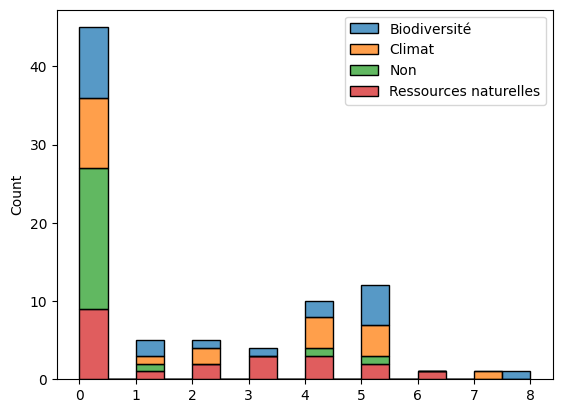

In [25]:
# Représentation Graphique
sns.histplot(somme_labels, multiple="stack", binwidth=0.5)

In [26]:
#5. Création de la matrice veilleur x titre
veilleur_x_titre = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values=labels, aggfunc='sum')
veilleur_x_titre

Biodiversité  \
Titre                                         17ème SIAM : OCP Nutricrops, Arvalis, Intercéréales et l'UM6P s’allient pour une gestion durable des sols   
Personne en charge de la veille (nom, prénom)                                                                                                             
Raphaël DEMONCHY                                                                             NaN                                                          
Véronique ETIENNE                                                                            NaN                                                          
veilleur_1                                                                                   0.0                                                          
veilleur_10                                                                                  NaN                                                          
veilleur_11                                                                                  1.0                                                          
veilleur_12                                                                                  NaN                                                          
veilleur_13                                                                                  NaN                                                          
veilleur_2                                                                                   NaN                                                          
veilleur_3                                                                                   0.0                                                          
veilleur_4                                                                                   0.0                                                          
veilleur_5                                                                                   NaN                                                          
veilleur_6                                                                                   NaN                                                          
veilleur_7                                                                                   NaN                                                          
veilleur_8                                                                                   0.0                                                          
veilleur_9                                                                                   NaN                                                          

                                                                                                                       \
Titre                                         Auray La goélette Tara fait une escale dédiée à la pêche durable à Etel   
Personne en charge de la veille (nom, prénom)                                                                           
Raphaël DEMONCHY                                                                             1.0                        
Véronique ETIENNE                                                                            NaN                        
veilleur_1                                                                                   1.0                        
veilleur_10                                                                                  NaN                        
veilleur_11                                                                                  NaN                        
veilleur_12                                                                                  1.0                        
veilleur_13                                                                                  1.0                        
veilleur_2                                                                                   NaN                        
veilleur_3       

In [27]:
veilleur_x_titre.columns.levels[0]

Index(['Biodiversité', 'Climat', 'Non', 'Ressources naturelles'], dtype='object')

In [28]:
# 6. Matrice de Krippendorff
M_biodiv = np.array(veilleur_x_titre["Biodiversité"])
M_climat = np.array(veilleur_x_titre["Climat"])
M_ressources = np.array(veilleur_x_titre["Ressources naturelles"])

In [29]:
M_biodiv.shape, M_climat.shape, M_ressources.shape

((15, 21), (15, 21), (15, 21))

In [30]:
# 7. Calcul de l'alpha de Krippendorff pour chaque label
alpha_biodiv = krippendorff.alpha(reliability_data=M_biodiv, level_of_measurement="nominal")
print("Alpha de Krippendorff pour la colonne 'Biodiversité': {:.4f}".format(alpha_biodiv))
alpha_climat = krippendorff.alpha(reliability_data=M_climat, level_of_measurement="nominal")
print(f"Alpha de Krippendorff pour la colonne 'Climat': {alpha_climat:.4f}")
alpha_ressources = krippendorff.alpha(reliability_data=M_ressources, level_of_measurement="nominal")
print(f"Alpha de Krippendorff pour la colonne 'Ressources naturelles': {alpha_ressources:.4f}")
alpha = np.mean([alpha_biodiv, alpha_climat, alpha_ressources])
print(f"Alpha de Krippendorff pour la colonne '{col_to_test}': {alpha:.4f}")

Alpha de Krippendorff pour la colonne 'Biodiversité': 0.6124
Alpha de Krippendorff pour la colonne 'Climat': 0.6565
Alpha de Krippendorff pour la colonne 'Ressources naturelles': 0.4357
Alpha de Krippendorff pour la colonne 'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?': 0.5682


In [31]:
# 8. Calcul de la matrice de Krippendorff multilabels
bin_df["multilabel"] = bin_df[labels].apply(lambda x: str(x.tolist()), axis=1)
bin_df

,"Personne en charge de la veille (nom, prénom)",Titre,Biodiversité,Climat,Non,Ressources naturelles,multilabel
0,veilleur_1,Pourquoi le Groenland est l'objet des plus gra...,1,0,0,1,"[1, 0, 0, 1]"
1,veilleur_1,"Les secrets bien gardés de Montecristo, « l'îl...",1,0,0,0,"[1, 0, 0, 0]"
2,veilleur_1,Auray La goélette Tara fait une escale dédiée ...,1,0,0,0,"[1, 0, 0, 0]"
3,veilleur_1,De bonnes nouvelles,1,0,0,0,"[1, 0, 0, 0]"
4,veilleur_1,Carrières 5 moyens de décrocher un job à impact,1,1,0,1,"[1, 1, 0, 1]"
...,...,...,...,...,...,...,...
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,1,0,0,1,"[1, 0, 0, 1]"
216,veilleur_9,Mohamed Fikrat : Le secteur financier appelé à...,1,1,0,0,"[1, 1, 0, 0]"
217,veilleur_9,Pourquoi le Groenland est l'objet des plus gra...,0,0,0,0,"[0, 0, 0, 0]"
218,veilleur_9,Quelles conséquences de l’érosion du littoral ...,0,1,0,0,"[0, 1, 0, 0]"


In [32]:
# Création de la matrice veilleur x titre
veilleur_x_titre_multilabel = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values="multilabel", aggfunc='sum')
veilleur_x_titre_multilabel

Titre,"17ème SIAM : OCP Nutricrops, Arvalis, Intercéréales et l'UM6P s’allient pour une gestion durable des sols",Auray La goélette Tara fait une escale dédiée à la pêche durable à Etel,Auray Le nouveau complexe de La Forêt a accueilli ses premiers sportifs,Carrières 5 moyens de décrocher un job à impact,CriseiDes signes de reprise,De bonnes nouvelles,Groenland : l'incroyable eldorado des glaces,"La chute des cours des hydrocarbures, un frein à l'essor des énergies renouvelables","Le SDE 24, en soutien de la Mauritanie","Le loto de la biodiversité met l’accent sur le littoral, voici les sites retenus",...,"Michelin : Chiffre d’affaires en baisse de 1,9% suite au recul en Première monte, mix en nette progression. Dans un contexte de forte volatilité, le Groupe resserre son pilotage et laisse sa guidance 2025 inchangée.",Mohamed Fikrat : Le secteur financier appelé à être un catalyseur du changement pour l'agroforesterie,"Oliver Geden, le scientifique converti au stockage carbone",Planisware obtient la note B du CDP récompensant sa performance en matière de lutte contre le changement climatique,Pourquoi la France doit viser le mix énergétique,Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle,Quelles conséquences de l’érosion du littoral à 2050?,Quelles sont les solutions pour défiscaliser en 2025 ?,"« Il y a 50 ans, on nous prenait pour des rigolos »","À La Rochelle, on sait recycler les terres rares !"
"Personne en charge de la veille (nom, prénom)",,,,,,,,,,,,,,,,,,,,,
Raphaël DEMONCHY,NaN,"[1, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[0, 1, 0, 0]",NaN,"[1, 0, 0, 1]",NaN,NaN,"[1, 0, 0, 1]",NaN
Véronique ETIENNE,NaN,NaN,"[0, 0, 1, 0]",NaN,"[0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]","[0, 0, 1, 0]",NaN,"[0, 1, 0, 1]"
veilleur_1,"[0, 1, 0, 1]","[1, 0, 0, 0]",NaN,"[1, 1, 0, 1]",NaN,"[1, 0, 0, 0]","[0, 0, 0, 0]",NaN,NaN,NaN,...,NaN,"[0, 1, 0, 0]",NaN,NaN,NaN,"[1, 0, 0, 1]",NaN,NaN,"[1, 0, 0, 1]",NaN
veilleur_10,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 0]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
veilleur_11,"[1, 1, 0, 0]",NaN,"[0, 1, 0, 0]",NaN,"[0, 1, 0, 0]","[1, 0, 0, 0]","[1, 0, 0, 1]","[0, 1, 0, 1]",NaN,NaN,...,"[0, 0, 1, 0]",NaN,"[0, 1, 0, 0]",NaN,NaN,NaN,NaN,NaN,"[1, 0, 0, 0]","[0, 0, 0, 1]"
veilleur_12,NaN,"[1, 0, 0, 0]",NaN,NaN,NaN,"[1, 0, 0, 0]","[0, 0, 0, 1]",NaN,"[0, 0, 0, 1]","[1, 0, 0, 0]",...,"[0, 0, 1, 0]","[1, 0, 0, 1]","[0, 1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 0, 1]"
veilleur_13,NaN,"[1, 0, 0, 0]","[0, 1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,"[1, 0, 0, 0]",...,"[0, 0, 1, 0]","[1, 1, 0, 1]","[0, 1, 0, 0]","[0, 1, 0, 1]",NaN,NaN,"[1, 0, 0, 0]","[0, 0, 1, 0]",NaN,NaN
veilleur_2,NaN,NaN,NaN,"[1, 1, 0, 1]",NaN,"[1, 0, 0, 0]","[1, 0, 0, 1]","[0, 1, 0, 0]",NaN,NaN,...,"[0, 0, 1, 0]","[1, 0, 0, 0]",NaN,NaN,"[0, 1, 0, 0]",NaN,NaN,"[0, 0, 1, 0]",NaN,NaN
veilleur_3,"[0, 1, 0, 1]",NaN,"[0, 1, 0, 0]","[1, 1, 0, 1]","[1, 1, 0, 1]",NaN,NaN,NaN,"[0, 0, 0, 1]","[1, 0, 0, 0]",...,NaN,"[0, 1, 0, 1]",NaN,NaN,"[0, 1, 0, 1]",NaN,"[0, 1, 0, 0]",NaN,NaN,NaN


In [33]:
#8. Matrice de Krippendorff multilabels
M_multilabel = np.array(veilleur_x_titre_multilabel, dtype="U")
print("shape: ", M_multilabel.shape)
print("kind: ", M_multilabel.dtype.kind)
print("Unique values:", np.unique(M_multilabel[M_multilabel != "nan"]))

shape:  (15, 21)
kind:  U
Unique values: ['[0, 0, 0, 0]' '[0, 0, 0, 1]' '[0, 0, 1, 0]' '[0, 1, 0, 0]'
 '[0, 1, 0, 1]' '[1, 0, 0, 0]' '[1, 0, 0, 1]' '[1, 1, 0, 0]'
 '[1, 1, 0, 1]']


In [34]:
# 9. Calcul de l'alpha de Krippendorff multilabels
alpha_multilabel = krippendorff.alpha(reliability_data=M_multilabel, level_of_measurement="nominal")
print(f"Alpha de Krippendorff pour la matrice multilabels: {alpha_multilabel:.4f}")

Alpha de Krippendorff pour la matrice multilabels: 0.4748


In [35]:
# Insertion dans le dataframe
result_df = pd.DataFrame({
    "Variable": [col_to_test],
    "Alpha de Krippendorff - Moyenne des labels": [alpha],
    "Alpha de Krippendorff - Multilabels": [alpha_multilabel]
})
result_df

,Variable,Alpha de Krippendorff - Moyenne des labels,Alpha de Krippendorff - Multilabels
0,Le sujet de l'article concerne-t-il un ou plus...,0.568216,0.474828


### Alpha par variable

In [36]:
# Boucle sur tous les articles, toutes les colonnes
result_df = pd.DataFrame()
mlb = MultiLabelBinarizer()
alpha_dict = {} # -> {question: {"per_label": {label: alpha}, "multilabel": alpha}}

for q in questions_cols:
    print(f"-------------- Calcul de Alpha de Krippendorff sur la question: ------------------\n => {q} ")
    
    # Initiatisation des variables
    alpha = []
    bin_df = pd.DataFrame()
    
    # Initialisation du bloc résultat pour la question
    alpha_dict[q] = {"per_label": {}, "multilabel": None}

    # Créer le dataset du titre
    data_test = df_base[[col_veilleur, col_titre, q]]    
        
    # Vérification si la colonne est vide:
    if data_test[q].isna().all():
        print(f"La colonne '{q}' pour l'article '{col_titre}' est vide. Passer à la suivante.")
        alpha = None
        alpha_multilabel = None
            
    else:
        # Remplacer NaN par listes vides et transformer en liste de labels
        data_encoded = data_test[[col_veilleur, col_titre, q]].copy()
        data_encoded["labels"] = data_encoded[q].apply(to_list_multilabel)

        # Transformer les données
        encoded = mlb.fit_transform(data_encoded["labels"])
        labels = list(mlb.classes_)
            
        # Créer un DataFrame avec les colonnes binaires et la colonne multilabels
        bin_df = pd.concat([data_encoded[[col_veilleur, col_titre]], pd.DataFrame(encoded, columns=labels, index=data_encoded.index)], axis=1)
        bin_df["multilabel"] = bin_df[labels].apply(lambda x: str(x.tolist()), axis=1)
                    
        # Créer les matrices pour les calculs de Krippendorff
        veilleur_x_titre = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values=labels, aggfunc='sum')
        veilleur_x_titre_multilabel = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values="multilabel", aggfunc='sum')
        M_multilabel = np.array(veilleur_x_titre_multilabel, dtype="U")
         
        # Alpha par label
        for label in veilleur_x_titre.columns.levels[0]:
            try:
                krippendorff_alpha_label = krippendorff.alpha(reliability_data=np.array(veilleur_x_titre[label]), level_of_measurement="nominal")
                print(f"Alpha de Krippendorff pour la colonne {label}: {krippendorff_alpha_label:.4f}")

            except Exception as e:
                print(f"Erreur lors du calcul de l'alpha de Krippendorff pour le label {label}: {e}")
                krippendorff_alpha_label = None

            # Mise à jour du dictionnaire
            alpha_dict[q]["per_label"][label] = krippendorff_alpha_label
            alpha.append(krippendorff_alpha_label)
            
        # Alpha multilabel
        try:
            alpha_multilabel = krippendorff.alpha(reliability_data=M_multilabel, level_of_measurement="nominal")
            print(f"Alpha de Krippendorff pour la matrice multilabels: {alpha_multilabel:.4f}")  
            
        except Exception as e:
            print(f"Erreur lors du calcul de l'alpha de Krippendorff multilabel {col_to_test}: {e}")
            alpha_multilabel = None
        
        # Mise à jour du dictionnaire
        alpha_dict[q]["multilabel"] = alpha_multilabel
        
        # Insertion dans le dataframe
        result_df = pd.concat([
            result_df,
            pd.DataFrame({
                "Variable": [q],
                "Alpha de Krippendorff - Moyenne des labels": [np.mean(alpha)],
                "Alpha de Krippendorff - Médiane des labels": [np.median(alpha)],
                "Alpha de Krippendorff - Multilabels": [alpha_multilabel]
            })
        ], ignore_index=True)       

# Affichage des résultats
result_df

-------------- Calcul de Alpha de Krippendorff sur la question: ------------------
 => Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques? 
Alpha de Krippendorff pour la colonne Biodiversité: 0.6124
Alpha de Krippendorff pour la colonne Climat: 0.6565
Alpha de Krippendorff pour la colonne Non: 0.7830
Alpha de Krippendorff pour la colonne Ressources naturelles: 0.4357
Alpha de Krippendorff pour la matrice multilabels: 0.4748
-------------- Calcul de Alpha de Krippendorff sur la question: ------------------
 => L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques? 
Alpha de Krippendorff pour la colonne causes: 0.0000
Alpha de Krippendorff pour la colonne constats: 0.1519
Alpha de Krippendorff pour la colonne conséquences: -0.0088
Alpha de Krippendorff pour la colonne solutions: -0.0306
Alpha de Krippendorff pour la matrice multilabels: -0.0156
-------------- Calcul de Alpha de Krippendorff sur la question: ---------------

,Variable,Alpha de Krippendorff - Moyenne des labels,Alpha de Krippendorff - Médiane des labels,Alpha de Krippendorff - Multilabels
0,Le sujet de l'article concerne-t-il un ou plus...,0.621917,0.634459,0.474828
1,"L'article évoque-t-il les causes, conséquences...",0.028131,-0.004386,-0.015612
2,L'article traite-t-il d'un ou plusieurs secteu...,0.304940,0.303140,0.272208
3,"Si l'article aborde des SOLUTIONS, sur quel(s)...",0.406993,0.373824,0.361235
4,"Si l'article parle de la crise climatique, évo...",0.227719,0.228883,0.245562
5,Quels enjeux sont évoqués ?,0.113306,0.112939,0.130506
6,L'article parle-t-il d'un évènement climatique?,0.127926,0.185664,0.209999
7,Si l'article parle de la crise de la biodivers...,0.117937,0.083462,0.163847
8,Type(s) de milieu mentionné(s)?,0.328581,0.320874,0.414593
9,L'article évoque-t-il les causes de l'érosion ...,0.301236,0.302638,0.259735


In [37]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Analyse_lecture_presse-ecrite_Ete2025_Krippendorff.csv")
result_df.to_csv(output_file, index=False)

In [38]:
# Dictionnaire par label
alpha_dict

{"Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?": {'per_label': {'Biodiversité': np.float64(0.6124387254901961),
   'Climat': np.float64(0.6564797794117647),
   'Non': np.float64(0.7830188679245282),
   'Ressources naturelles': np.float64(0.4357303732303732)},
  'multilabel': np.float64(0.4748279209318743)},
 "L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?": {'per_label': {'causes': np.float64(0.0),
   'constats': np.float64(0.1519174041297935),
   'conséquences': np.float64(-0.00877192982456143),
   'solutions': np.float64(-0.030619865571321903)},
  'multilabel': np.float64(-0.015611504577647484)},
 "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?": {'per_label': {'Agriculture/Alimentation': np.float64(0.661764705882353),
   'Aucun de ces secteurs': np.float64(0.15441176470588236),
   'Bâtiment': np.float64(0.6985583224115335),
   'Eau': np.float64(0.3725198412698413),
   'Economie Circul

### Visualisation

In [39]:
# Typologie questions
questions_generales = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?", 
    "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
    "Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?"
]
questions_climat = [
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?", 
    'Quels enjeux sont évoqués ?', 
    "L'article parle-t-il d'un évènement climatique?"
]
questions_biodiv = [
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?", 
    'Type(s) de milieu mentionné(s)?', 
    "L'article évoque-t-il les causes de l'érosion de la biodiversité?"
]
questions_ressources = [
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Type de ressource évoquée"]


In [40]:
# Questions générales
alpha_dict_general = {q: alpha_dict[q] for q in questions_generales if q in alpha_dict}
fig = make_multi_figure(alpha_dict_general, titre = "Alpha de Krippendorff par label — Questions générales", max_height=250, width=850)
fig.show()

In [41]:
# Questions Climat
alpha_dict_climat = {q: alpha_dict[q] for q in questions_climat if q in alpha_dict}
fig = make_multi_figure(alpha_dict_climat, titre = "Alpha de Krippendorff par label — Questions sur la crise climatique", width=950)
fig.show()

In [42]:
# Questions Biodiversité
alpha_dict_biodiv = {q: alpha_dict[q] for q in questions_biodiv if q in alpha_dict}
fig = make_multi_figure(alpha_dict_biodiv, titre = "Alpha de Krippendorff par label — Questions sur la crise de la biodiversité", width=1500)
fig.show()

In [43]:
# Questions Ressources
alpha_dict_ressources = {q: alpha_dict[q] for q in questions_ressources if q in alpha_dict}
fig = make_multi_figure(alpha_dict_ressources, titre = "Alpha de Krippendorff par label — Questions sur la crise des ressources", width=850)
fig.show()

In [44]:
alpha_dict_ressources

{"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?": {'per_label': {'causes': np.float64(0.15367965367965364),
   'constats': np.float64(0.10808580858085814),
   'conséquences': np.float64(0.15367965367965364),
   'solutions': np.float64(0.20572916666666663)},
  'multilabel': np.float64(0.11610032362459533)},
 'Type de ressource évoquée': {'per_label': {'Air': np.float64(0.0),
   'Déchets': np.float64(0.1519174041297935),
   'Eau': np.float64(0.5389150943396226),
   'Energie': np.float64(0.04166666666666663),
   'Forêt': np.float64(0.11732456140350878),
   'Métaux/minerais': np.float64(0.5973389355742297),
   'Sol': np.float64(0.3528138528138528)},
  'multilabel': np.float64(0.35359589041095896)}}

In [45]:
questions_ressources

["Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",
 'Type de ressource évoquée']

In [46]:
alpha_dict["Type de ressource évoquée"]

{'per_label': {'Air': np.float64(0.0),
  'Déchets': np.float64(0.1519174041297935),
  'Eau': np.float64(0.5389150943396226),
  'Energie': np.float64(0.04166666666666663),
  'Forêt': np.float64(0.11732456140350878),
  'Métaux/minerais': np.float64(0.5973389355742297),
  'Sol': np.float64(0.3528138528138528)},
 'multilabel': np.float64(0.35359589041095896)}

### Alpha par variable

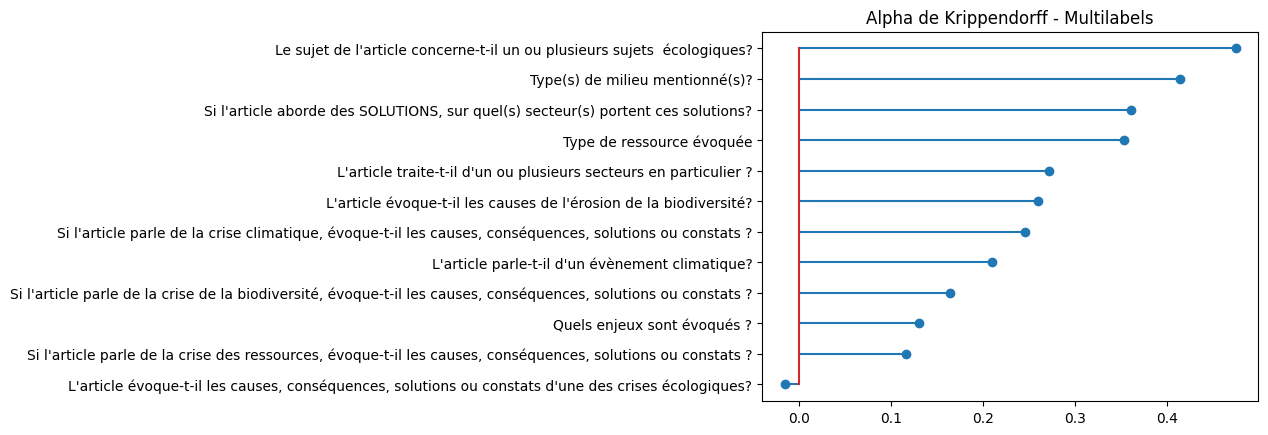

In [47]:
# Lollipop 
col = 'Alpha de Krippendorff - Multilabels'
ordered_df = result_df.sort_values(by=col)
plt.stem(ordered_df["Variable"], ordered_df[col], orientation="horizontal")
plt.yticks(ordered_df["Variable"])
plt.title(col)
plt.show()

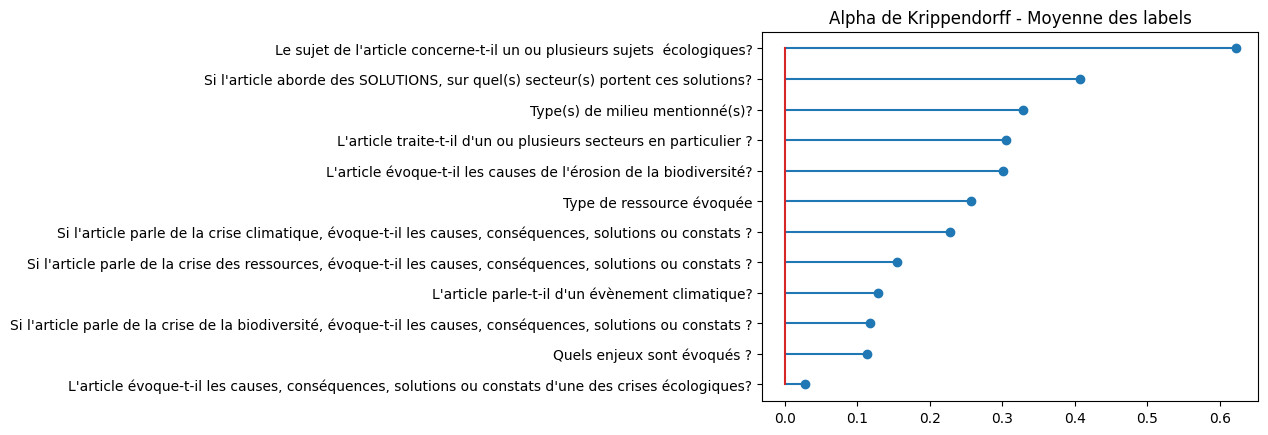

In [48]:
# Lollipop 
col = 'Alpha de Krippendorff - Moyenne des labels'
ordered_df = result_df.sort_values(by=col)
plt.stem(ordered_df["Variable"], ordered_df[col], orientation="horizontal")
plt.yticks(ordered_df["Variable"])
plt.title(col)
plt.show()

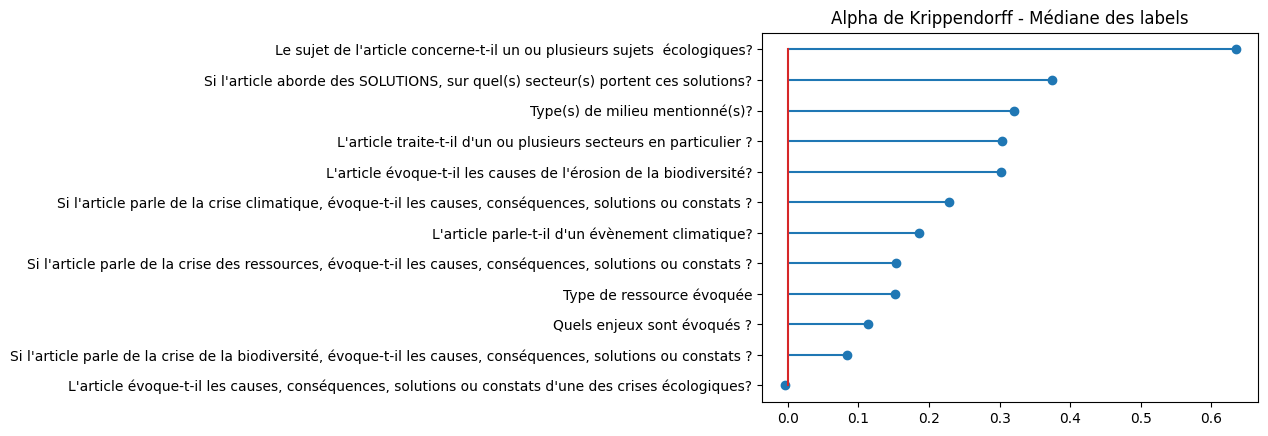

In [49]:
# Lollipop 
col = 'Alpha de Krippendorff - Médiane des labels'
ordered_df = result_df.sort_values(by=col)
plt.stem(ordered_df["Variable"], ordered_df[col], orientation="horizontal")
plt.yticks(ordered_df["Variable"])
plt.title(col)
plt.show()

In [50]:
# Valeur moyenne par type de variable
fig = go.Figure()

fig.add_trace(go.Bar(
    y=result_df["Variable"],
    x=result_df["Alpha de Krippendorff - Moyenne des labels"],
    name="Moyenne des labels",
    orientation='h',
    hovertemplate="Moyenne: %{x:.3f}"
))

fig.add_trace(go.Bar(
    y=result_df["Variable"],
    x=result_df["Alpha de Krippendorff - Médiane des labels"],
    name="Médiane des labels",
    orientation='h',
    hovertemplate="Médiane: %{x:.3f}"
))
fig.add_trace(go.Bar(
    y=result_df["Variable"],
    x=result_df["Alpha de Krippendorff - Multilabels"], 
    name="Multilabel",
    orientation='h',
    hovertemplate="Multilabel: %{x:.3f}"
))

fig.update_layout(
    title="Valeurs de l'alpha de Krippendorff Multilabel",
    xaxis_title="Alpha de Krippendorff",
    yaxis_title="Variable",
    barmode='group',
)

fig.show()

## Analyse des veilleurs expérimentés

In [51]:
dict_veilleurs = {
    "Veronika": "veilleur_3",
    "Isabelle": "veilleur_4",
    "Claire": "veilleur_9",
    "Raphaël": "veilleur_10",
    "Louna": "veilleur_13"
}

In [52]:
# Selection des données des veilleurs experimentés

In [53]:
df_exp = df[df[col_veilleur].isin(dict_veilleurs.values())]
df_exp[col_veilleur].unique()

array(['veilleur_10', 'veilleur_13', 'veilleur_3', 'veilleur_4',
       'veilleur_9'], dtype=object)

In [54]:
# Organisation par titre
df_exp = df_exp.sort_values(col_titre)

In [55]:
# Selection des articles du pack de base
df_exp_base = df_exp[df_exp.Pack == "Base"]
df_exp_base.Pack.unique()

array(['Base'], dtype=object)

In [56]:
# Nombre de veilleur par article
veilleur_par_article = df_exp_base.groupby(col_titre)[col_veilleur].nunique().sort_values(ascending=False)
veilleur_par_article

Titre
Mohamed Fikrat : Le secteur financier appelé à être un catalyseur du changement pour l'agroforesterie                                                                                                                      3
Quelles conséquences de l’érosion du littoral à 2050?                                                                                                                                                                      3
Les secrets bien gardés de Montecristo, « l'île-trésor » de la Méditerranée                                                                                                                                                3
Groenland : l'incroyable eldorado des glaces                                                                                                                                                                               3
Pourquoi la France doit viser le mix énergétique                                                              

In [57]:
# Selection des titre avec au moins 2 veilleurs
selection_titre = veilleur_par_article[veilleur_par_article>=2].index

In [58]:
# Construction du dataframe
df_exp_base = df_exp_base[df_base[col_titre].isin(selection_titre)].sort_values(col_titre)
df_exp_base

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
130,veilleur_4,Base,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",Libération_1745578060000_155.pdf,Climat,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,"""Bien matériel (infrastructures routières, bât...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
113,veilleur_3,Base,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",Libération_1745578060000_155.pdf,"Climat, Ressources naturelles",NaN,Agriculture/Alimentation,Agriculture/Alimentation,solutions,NaN,NON,NaN,NaN,NaN,solutions,Sol,NaN,NaN,True
112,veilleur_3,Base,Auray Le nouveau complexe de La Forêt a accuei...,LeTélégramme_1745473991000_5442.pdf,Climat,NaN,Bâtiment,Bâtiment,solutions,NaN,NON,NaN,NaN,NaN,NaN,NaN,"Classé comme parlant de la crise, mais n'évoqu...","je trouve que le mot ""crise"" fait beaucoup dou...",True
81,veilleur_13,Base,Auray Le nouveau complexe de La Forêt a accuei...,LeTélégramme_1745473991000_5442.pdf,Climat,NaN,"Bâtiment, Energie","Bâtiment, Energie",solutions,"""Bien matériel (infrastructures routières, bât...",NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
134,veilleur_4,Base,Groenland : l'incroyable eldorado des glaces,LePoint_1744884280000_3602.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
215,veilleur_9,Base,Groenland : l'incroyable eldorado des glaces,LePoint_1744884280000_3602.pdf,"Ressources naturelles, Biodiversité",NaN,Ecosystèmes,NaN,NaN,NaN,NON,conséquences,"Banquise/Glaciers, Océans","""Surexploitation des ressources (épuisement de...","causes, conséquences, solutions","Métaux/minerais, Déchets",RESSOURCE : par cause de la crise des minérais...,i lmanque clairement le lexique pour s'assurer...,True
27,veilleur_10,Base,Groenland : l'incroyable eldorado des glaces,LePoint_1744884280000_3602.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
116,veilleur_3,Base,"Le SDE 24, en soutien de la Mauritanie",SudOuest_1745469056000_5319.pdf,Ressources naturelles,NaN,Eau,Eau,NaN,NaN,NaN,NaN,NaN,NaN,solutions,Eau,NaN,NaN,True
127,veilleur_4,Base,"Le SDE 24, en soutien de la Mauritanie",SudOuest_1745469056000_5319.pdf,Ressources naturelles,solutions,Agriculture/Alimentation,Eau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eau,"Déserts et oasis en Mauritanie, il n'y a peut-...",NaN,True
79,veilleur_13,Base,Le loto de la biodiversité met l’accent sur le...,LeHuffPost_1745524807000_693.pdf,Biodiversité,NaN,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [59]:
# Export du dataframe
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege_veilleurs_experimentes.xlsx")
df_exp_base.to_excel(output_file, index=False)

In [60]:
# Nombre d'articles analysés
df_exp_base[col_titre].nunique()

13

### calcul alpha de krippendorff 

In [61]:
# Boucle sur tous les articles, toutes les colonnes
result_df_exp = pd.DataFrame()
mlb = MultiLabelBinarizer()
alpha_dict_exp = {} # -> {question: {"per_label": {label: alpha}, "multilabel": alpha}}

for q in questions_cols:
    print(f"-------------- Calcul de Alpha de Krippendorff sur la question: ------------------\n => {q} ")
    
    # Initiatisation des variables
    alpha = []
    bin_df = pd.DataFrame()
    
    # Initialisation du bloc résultat pour la question
    alpha_dict_exp[q] = {"per_label": {}, "multilabel": None}

    # Créer le dataset du titre
    data_test_exp = df_exp_base[[col_veilleur, col_titre, q]]    
        
    # Vérification si la colonne est vide:
    if data_test_exp[q].isna().all():
        print(f"La colonne '{q}' pour l'article '{col_titre}' est vide. Passer à la suivante.")
        alpha = None
        alpha_multilabel = None
            
    else:
        # Remplacer NaN par listes vides et transformer en liste de labels
        data_encoded = data_test_exp[[col_veilleur, col_titre, q]].copy()
        data_encoded["labels"] = data_encoded[q].apply(to_list_multilabel)

        # Transformer les données
        encoded = mlb.fit_transform(data_encoded["labels"])
        labels = list(mlb.classes_)
            
        # Créer un DataFrame avec les colonnes binaires et la colonne multilabels
        bin_df = pd.concat([data_encoded[[col_veilleur, col_titre]], pd.DataFrame(encoded, columns=labels, index=data_encoded.index)], axis=1)
        bin_df["multilabel"] = bin_df[labels].apply(lambda x: str(x.tolist()), axis=1)
                    
        # Créer les matrices pour les calculs de Krippendorff
        veilleur_x_titre = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values=labels, aggfunc='sum')
        veilleur_x_titre_multilabel = bin_df.pivot_table(index=col_veilleur, columns=col_titre, values="multilabel", aggfunc='sum')
        M_multilabel = np.array(veilleur_x_titre_multilabel, dtype="U")
         
        # Alpha par label
        for label in veilleur_x_titre.columns.levels[0]:
            try:
                krippendorff_alpha_label = krippendorff.alpha(reliability_data=np.array(veilleur_x_titre[label]), level_of_measurement="nominal")
                print(f"Alpha de Krippendorff pour la colonne {label}: {krippendorff_alpha_label:.4f}")

            except Exception as e:
                print(f"Erreur lors du calcul de l'alpha de Krippendorff pour le label {label}: {e}")
                krippendorff_alpha_label = None

            # Mise à jour du dictionnaire
            alpha_dict_exp[q]["per_label"][label] = krippendorff_alpha_label
            alpha.append(krippendorff_alpha_label)
            
        # Alpha multilabel
        try:
            alpha_multilabel = krippendorff.alpha(reliability_data=M_multilabel, level_of_measurement="nominal")
            print(f"Alpha de Krippendorff pour la matrice multilabels: {alpha_multilabel:.4f}")  
            
        except Exception as e:
            print(f"Erreur lors du calcul de l'alpha de Krippendorff multilabel {col_to_test}: {e}")
            alpha_multilabel = None
        
        # Mise à jour du dictionnaire
        alpha_dict_exp[q]["multilabel"] = alpha_multilabel
        
        # Insertion dans le dataframe
        result_df_exp = pd.concat([
            result_df_exp,
            pd.DataFrame({
                "Variable": [q],
                "Alpha de Krippendorff - Moyenne des labels": [np.mean(alpha)],
                "Alpha de Krippendorff - Médiane des labels": [np.median(alpha)],
                "Alpha de Krippendorff - Multilabels": [alpha_multilabel]
            })
        ], ignore_index=True)       

# Affichage des résultats
result_df_exp

-------------- Calcul de Alpha de Krippendorff sur la question: ------------------
 => Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques? 
Alpha de Krippendorff pour la colonne Biodiversité: 0.4200
Alpha de Krippendorff pour la colonne Climat: 0.8711
Alpha de Krippendorff pour la colonne Non: 0.0000
Alpha de Krippendorff pour la colonne Ressources naturelles: 0.2750
Alpha de Krippendorff pour la matrice multilabels: 0.4184
-------------- Calcul de Alpha de Krippendorff sur la question: ------------------
 => L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques? 
Alpha de Krippendorff pour la colonne causes: 0.0000
Alpha de Krippendorff pour la colonne constats: 0.0000
Alpha de Krippendorff pour la colonne solutions: -0.1154
Alpha de Krippendorff pour la matrice multilabels: -0.1240
-------------- Calcul de Alpha de Krippendorff sur la question: ------------------
 => L'article traite-t-il d'un ou plusieurs secteurs en 

,Variable,Alpha de Krippendorff - Moyenne des labels,Alpha de Krippendorff - Médiane des labels,Alpha de Krippendorff - Multilabels
0,Le sujet de l'article concerne-t-il un ou plus...,0.391528,0.347500,0.418449
1,"L'article évoque-t-il les causes, conséquences...",-0.038462,0.000000,-0.124031
2,L'article traite-t-il d'un ou plusieurs secteu...,0.250952,0.000000,0.221228
3,"Si l'article aborde des SOLUTIONS, sur quel(s)...",0.357061,0.363129,0.422886
4,"Si l'article parle de la crise climatique, évo...",0.284726,0.222488,0.282686
5,Quels enjeux sont évoqués ?,0.093168,0.000000,0.079365
6,L'article parle-t-il d'un évènement climatique?,0.088170,0.000000,0.369565
7,Si l'article parle de la crise de la biodivers...,0.256882,0.283951,0.202500
8,Type(s) de milieu mentionné(s)?,0.101648,0.000000,0.066832
9,L'article évoque-t-il les causes de l'érosion ...,0.375916,0.482143,0.256410


### Graphiques

In [62]:
# Questions générales
alpha_dict_general_exp = {q: alpha_dict_exp[q] for q in questions_generales if q in alpha_dict_exp}
fig = make_multi_figure(alpha_dict_general_exp, titre = "Veilleurs Experimentés - Alpha de Krippendorff par label — Questions générales", max_height=250, width=850)
fig.show()

In [63]:
# Questions Climat
alpha_dict_climat_exp = {q: alpha_dict_exp[q] for q in questions_climat if q in alpha_dict_exp}
fig = make_multi_figure(alpha_dict_climat_exp, titre = "Veilleurs Experimentés - Alpha de Krippendorff par label — Questions sur la crise climatique", width=950)
fig.show()

In [64]:
# Questions Biodiversité
alpha_dict_biodiv_exp = {q: alpha_dict_exp[q] for q in questions_biodiv if q in alpha_dict_exp}
fig = make_multi_figure(alpha_dict_biodiv_exp, titre = "Veilleurs Experimentés - Alpha de Krippendorff par label — Questions sur la crise de la biodiversité", width=1500)
fig.show()

In [65]:
# Questions Ressources
alpha_dict_ressources_exp = {q: alpha_dict_exp[q] for q in questions_ressources if q in alpha_dict_exp}
fig = make_multi_figure(alpha_dict_ressources_exp, titre = "Veilleurs Experimentés - Alpha de Krippendorff par label — Questions sur la crise des ressources", width=850)
fig.show()

# Exploration des commentaires

## Lecture humaine

In [ ]:
# Extraction ddes commentaire pour chaque article
df_base_comment = df_base.groupby("Titre")["Commentaire"].apply(lambda s: " || ".join(map(str, s.dropna()))).reset_index(name="Commentaire")
df_base_amelior = df_base.groupby("Titre")["Proposition d'amélioration du tableau"].apply(lambda s: " || ".join(map(str, s.dropna()))).reset_index(name="proposition_amelioration")

In [ ]:
# Fusion des commentaires et propositions d'amélioration
qualitative_df_base = pd.merge(
    df_base_comment,
    df_base_amelior,
    on="Titre",
    how="outer"
)

In [ ]:
# Visualisation pour verification
qualitative_df_base

,Titre,Commentaire,proposition_amelioration
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",L'article évoque un partenariat entre institut...,l'article parle du besoin d'adaptation au chan...
1,Auray La goélette Tara fait une escale dédiée ...,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...
2,Auray Le nouveau complexe de La Forêt a accuei...,L'article évoque en passant les caractéristiqu...,"je trouve que le mot ""crise"" fait beaucoup dou..."
3,Carrières 5 moyens de décrocher un job à impact,Difficile à classer... Cet article parle de co...,La solution évoquée ici est de s'investir dans...
4,CriseiDes signes de reprise,L'article aborde un sujet écologique (l'agricu...,Sujet consommation et finance/aides ici est év...
5,De bonnes nouvelles,L'article evoque les critiques qui sont faites...,"Etant donné que c'est de la pêche de Loisirs, ..."
6,Groenland : l'incroyable eldorado des glaces,Meme article que premiere ligne || Manque de d...,i lmanque clairement le lexique pour s'assurer...
7,"La chute des cours des hydrocarbures, un frein...",La colonne enjeux évoqués dans la case climat ...,Différence Energies fossiles et Energies renou...
8,"Le SDE 24, en soutien de la Mauritanie","Déserts et oasis en Mauritanie, il n'y a peut-...",
9,Le loto de la biodiversité met l’accent sur le...,RAS,


In [ ]:
# Exporte le DataFrame agrégé dans un fichier Excel
qualitative_output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege_qualitative_data.xlsx")
qualitative_df_base.to_excel(qualitative_output_file, index=False)

## Machine Learning

In [ ]:
# Import des packages nécessaires
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud
from utils import *

### TF-IDF

In [ ]:
# Gestion des stopwords
french_stopwords = set("""
au aux avec ce ces dans de des du elle en et eux il je la le leur lui ma mais me même mes 
moi mon ne nos notre nous on ou par pas pour qu que qui sa se ses son sur ta te tes toi ton tu un une vos votre vous 
c d j l à m n s t y été étée étées étés étant étante étants étantes suis es est sommes êtes sont serai seras sera serons 
serez seront serais serait serions seriez seraient étais était étions étiez étaient fus fusent fut fûmes fûtes furent sois 
soit soyons soyez soient fusse fusses fût fussions fussiez fussent ai as avons avez ont aurai auras aura aurons aurez auront 
aurais aurait aurions auriez auraient avais avait avions aviez avaient eut eûmes eûtes eurent aie aies ait ayons ayez aient 
eusse eusses eût eussions eussiez eussent ceci cela cet cette ici il y a il y avait il y aura il y aurait il s'agit 
très plus moins comme aussi plutôt quand où alors donc cependant toutefois néanmoins mais car parce que puisque puisque 
depuis dès afin afin que afin de avant après pendant vers entre chez sans sous sur déjà encore toujours jamais rien tout 
tous toutes chaque aucun aucune quelques quelqu'un quelque quelque chose plusieurs tant tellement tellement que si sinon
article parle evoque évoquent évoque traite traitent traiter traitant traité traitée traitées traités être être à la 
reportage parlant evoquant traitant aborder aborde abordent aborderont aborderait aborderont abordé abordée 
abordées abordés abordant
""".split())

positive_words = set("""
excellent superbe formidable génial satisfaisant positif clair utile pertinent intéressant convaincant rigoureux 
constructif agréable magnifique bravo bien bon excellente admiré apprécié cohérent
""".split())

negative_words = set("""
mauvais médiocre nul horrible décevant négatif confus inutile hors-sujet faux mensonger problématique biaisé agressif
colérique incohérent pauvre faible catastrophique lamentable navrant tristesse colère honte scandale honteux dommage 
critique difficile déplorable inquiétant alarmant choquant désastreux
""".split())



In [ ]:
# Clean
df_base["Commentaire"] = df_base["Commentaire"].astype(str)
df_base["Commentaire_clean"] = df_base["Commentaire"].apply(lambda s: clean_text(s, french_stopwords))
df_base["Commentaire_length"] = df_base["Commentaire_clean"].str.len()

In [ ]:
df_base[["Commentaire","Commentaire_clean", "Commentaire_length"]].head(10)

In [ ]:
# TF-IDF (1-2 grams helps capture short phrases)
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=1)
X = tfidf.fit_transform(df_base["Commentaire_clean"])

In [ ]:
# Kmeans clustering
if X.shape[0] >= 4:
    k = choose_k_by_silhouette(X, k_min=2, k_max=8)
else:
    k = 1
if k == 1:
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_terms = {0: []}
else:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    cluster_terms = extract_top_terms_per_cluster(tfidf, X, labels, topn=10)
df_base["cluster"] = labels

In [ ]:
# Nombre de clusters
n_clusters = df_base["cluster"].nunique()

In [ ]:
df_base["cluster"].value_counts()

In [ ]:
def plot_kmeans(X, km_model, use_pca=True, title=None):
    """
    X : ndarray de forme (n_samples, n_features)
    use_pca : projeter en 2D si n_features > 2
    """
    labels = km_model.labels_
    centers = km_model.cluster_centers_

    # Projection 2D (PCA si besoin)
    if X.shape[1] > 2 and use_pca:
        pca = PCA(n_components=2, random_state=42)
        X2 = pca.fit_transform(X)
        C2 = pca.transform(centers)
        xlabel, ylabel = "PC1", "PC2"
    else:
        X2 = X[:, :2]
        C2 = centers[:, :2] if centers.shape[1] >= 2 else np.c_[centers, np.zeros((centers.shape[0], 2 - centers.shape[1]))]
        xlabel, ylabel = "x1", "x2"

    # Scatter des points
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=X2[:, 0],
        y=X2[:, 1],
        c=labels.astype("float"),
    )
    plt.xlabel("F1")
    plt.ylabel("F2")
    plt.title(f"KMeans (k={n_clusters})")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualisation
plot_kmeans(X, km_model=km)